In [1]:
# Import packages:

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Load datasets:

players = pd.read_csv(r'../datasets/players_clean.csv',index_col=[0], low_memory=False)
stats = pd.read_csv(r'../datasets/stats_clean.csv',index_col=[0])
games = pd.read_csv(r'../datasets/games_clean.csv',index_col=[0])

In [3]:
games.columns

Index(['id', 'rated', 'created_at', 'duration', 'turns', 'victory_status',
       'winner', 'winner_bin', 'time_ctrl', 'increment_code', 'white_id',
       'white_rating', 'black_id', 'black_rating', 'rating_dif', 'moves',
       'opening_eco', 'opening_name', 'opening_simple', 'opening_moves',
       'opening_10', 'opening_ply', 'simpler_opening'],
      dtype='object')

In [4]:
games.describe() 
#while there is a large range for many of these, none of them fall outside of expected results for chess games

,turns,winner_bin,white_rating,black_rating,rating_dif,opening_ply
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,0.498604,1596.631868,1588.831987,7.799880,4.816981
std,33.570585,0.500011,291.253376,291.036126,249.036667,2.797152
min,1.000000,0.000000,784.000000,789.000000,-1605.000000,1.000000
25%,37.000000,0.000000,1398.000000,1391.000000,-108.000000,3.000000
50%,55.000000,0.000000,1567.000000,1562.000000,3.000000,4.000000
75%,79.000000,1.000000,1793.000000,1784.000000,122.000000,6.000000
max,349.000000,1.000000,2700.000000,2723.000000,1499.000000,28.000000


In [5]:
games_c = games[['turns','winner_bin','white_rating','black_rating','rating_dif','opening_ply']]

C:\Users\joshu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


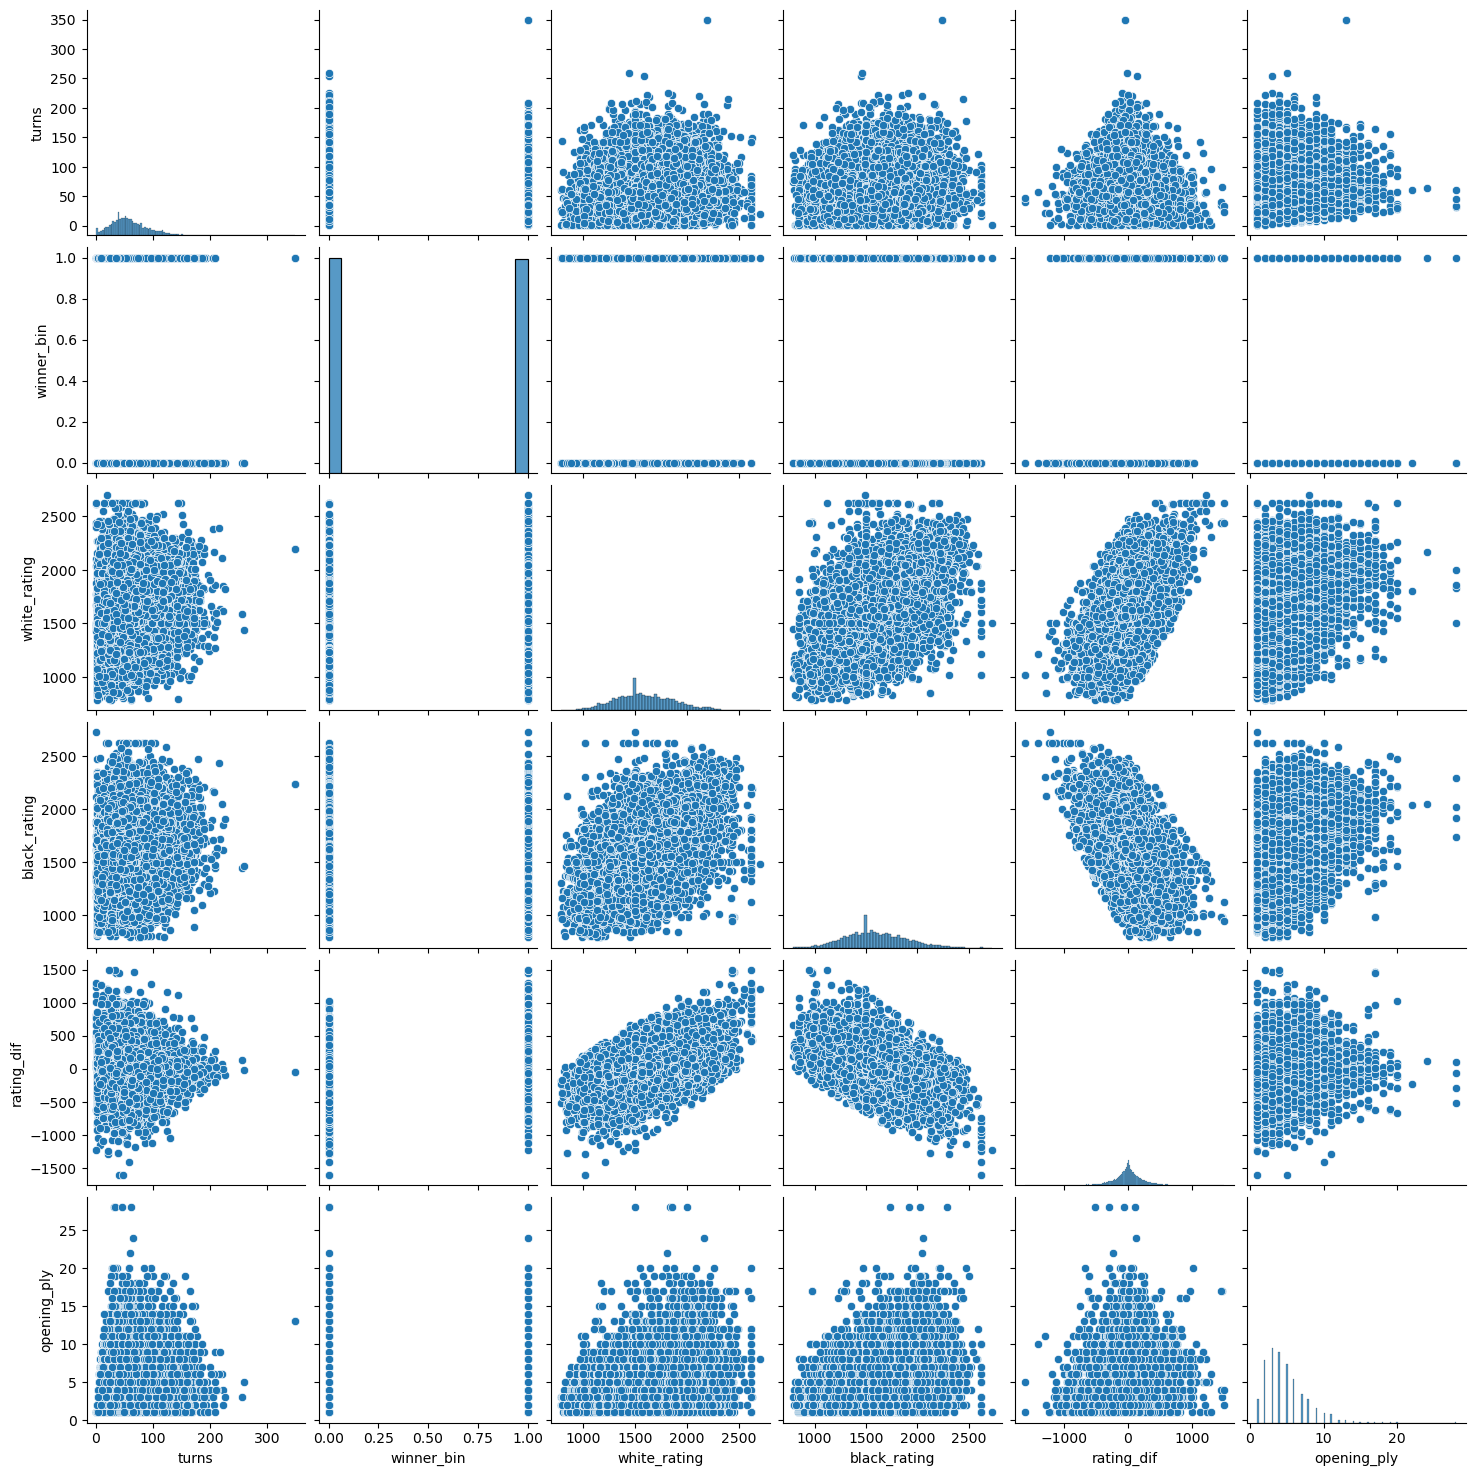

In [6]:
sns.pairplot(games_c)
plt.show()
#suggests SOME correlations possible, but not in any areas where they weren't already expected

In [7]:
corr = games_c.corr()
corr 

,turns,winner_bin,white_rating,black_rating,rating_dif,opening_ply
turns,1.000000,-0.079486,0.129753,0.160467,-0.035781,0.055999
winner_bin,-0.079486,1.000000,0.128577,-0.171172,0.350413,0.016091
white_rating,0.129753,0.128577,1.000000,0.634171,0.428398,0.277379
black_rating,0.160467,-0.171172,0.634171,1.000000,-0.426972,0.255396
rating_dif,-0.035781,0.350413,0.428398,-0.426972,1.000000,0.025932
opening_ply,0.055999,0.016091,0.277379,0.255396,0.025932,1.000000


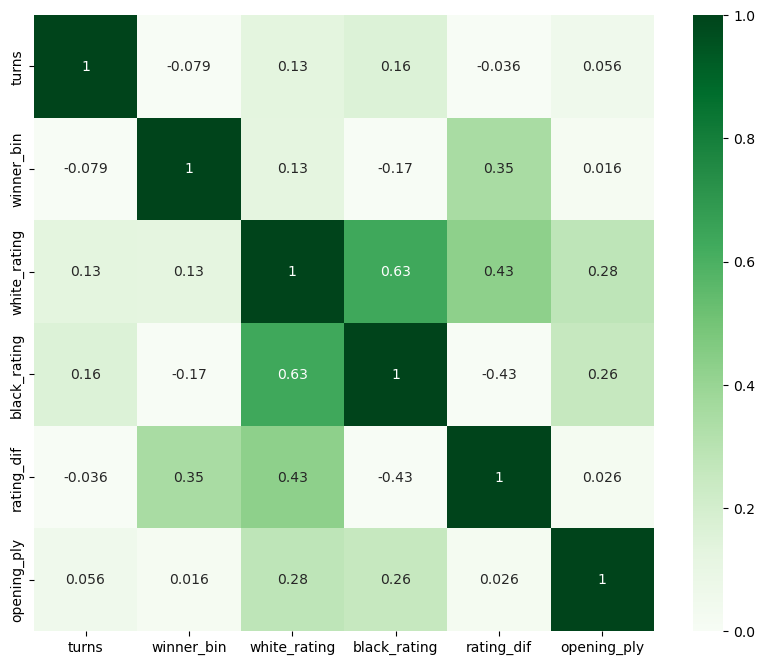

In [8]:
plt.figure(figsize=(10,8))

sns.heatmap(data=corr, cmap = 'Greens', annot=True, vmin=0)

plt.show()
#No strong correlations shown except between white_rating and black_rating, to be expected given the matching system

In [9]:
stats.describe()
#Nothing noteworthy here
#Note to self: consider including 'percent_GM/IM/FM' to see where the ratio of titled players to all players is greatest per country
#Do this in Tableau at least

,Num Players,Women,% of Women,FIDE Average,GMs,IMs,FMs,WGMs,WIMs,WFMs,Age Avg
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,1851.632979,197.750000,11.820638,1634.659574,9.074468,20.462766,42.750000,1.654255,4.351064,9.106383,36.739362
std,4870.425325,561.516593,8.239526,166.601067,23.446031,51.465514,118.988546,4.853207,10.010911,31.322872,8.267658
min,2.000000,0.000000,0.000000,1141.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,47.750000,6.000000,5.935000,1544.500000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,31.000000
50%,298.500000,33.500000,10.785000,1651.000000,0.000000,3.000000,8.500000,0.000000,0.500000,3.000000,36.000000
75%,1228.750000,181.500000,17.402500,1742.000000,8.250000,22.000000,30.250000,1.000000,4.000000,9.000000,41.250000
max,34497.000000,5734.000000,37.500000,2250.000000,236.000000,522.000000,1177.000000,50.000000,101.000000,409.000000,63.000000


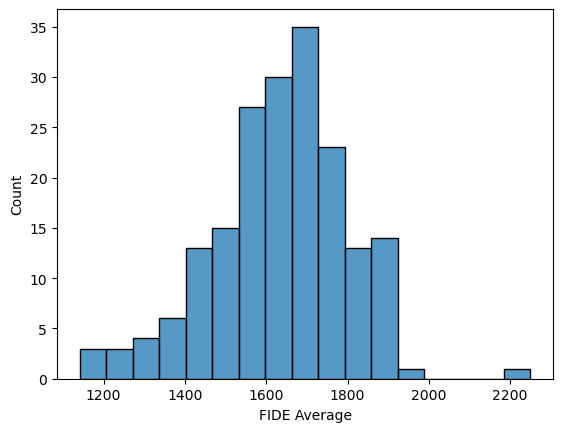

In [10]:
sns.histplot(data=stats, x = 'FIDE Average')
plt.show()
#normal-ish looking distribution

In [11]:
#hold off on dropping Country in the future? Country might be a contributing variable, though likely a volatile one
stats_2 = stats.drop('Country', axis=1) 
stats_2

,Num Players,Women,% of Women,FIDE Average,GMs,IMs,FMs,WGMs,WIMs,WFMs,Age Avg
index,,,,,,,,,,,
0,34497,5734,16.62,1666,236,522,1177,50,101,409,34
1,32735,3581,10.94,1275,64,114,83,9,41,42,27
2,26577,1751,6.59,1841,94,273,861,18,40,69,49
3,25009,1430,5.72,1429,55,134,365,2,14,37,42
4,23784,2143,9.01,1580,50,117,234,4,18,21,41
...,...,...,...,...,...,...,...,...,...,...,...
185,6,0,0.00,1820,0,0,0,0,0,0,31
186,4,0,0.00,1749,0,0,0,0,0,0,54
187,4,0,0.00,1556,0,0,0,0,0,0,38


In [12]:
corr = stats_2.corr()
corr

,Num Players,Women,% of Women,FIDE Average,GMs,IMs,FMs,WGMs,WIMs,WFMs,Age Avg
Num Players,1.000000,0.920168,-0.052895,-0.071449,0.783998,0.816500,0.800427,0.652406,0.783620,0.663664,0.044575
Women,0.920168,1.000000,0.066081,-0.098209,0.840744,0.847685,0.794101,0.781504,0.879170,0.842623,-0.078891
% of Women,-0.052895,0.066081,1.000000,-0.236568,0.019255,-0.015809,-0.048592,0.118513,0.104776,0.096334,-0.576983
FIDE Average,-0.071449,-0.098209,-0.236568,1.000000,0.112279,0.116148,0.131290,0.095681,0.069354,0.046138,0.532940
GMs,0.783998,0.840744,0.019255,0.112279,1.000000,0.971773,0.903984,0.933943,0.943228,0.857166,0.046888
IMs,0.816500,0.847685,-0.015809,0.116148,0.971773,1.000000,0.957340,0.905017,0.939332,0.867504,0.096504
FMs,0.800427,0.794101,-0.048592,0.131290,0.903984,0.957340,1.000000,0.831257,0.865272,0.845983,0.137924
WGMs,0.652406,0.781504,0.118513,0.095681,0.933943,0.905017,0.831257,1.000000,0.911112,0.863892,-0.038509
WIMs,0.783620,0.879170,0.104776,0.069354,0.943228,0.939332,0.865272,0.911112,1.000000,0.872647,-0.043599
WFMs,0.663664,0.842623,0.096334,0.046138,0.857166,0.867504,0.845983,0.863892,0.872647,1.000000,-0.041316


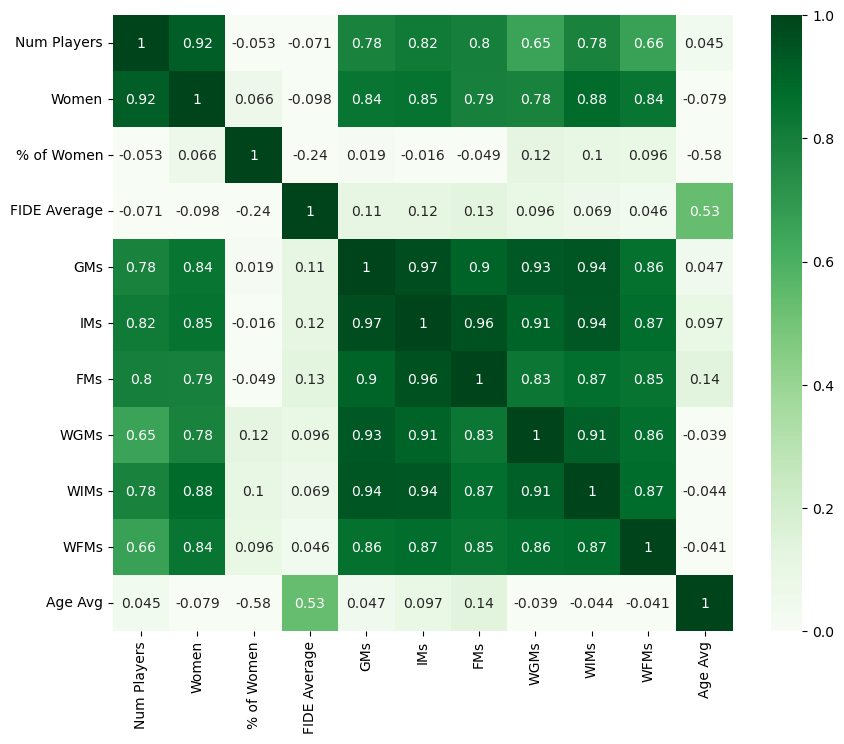

In [13]:
plt.figure(figsize=(10,8))

sns.heatmap(data=corr, cmap = 'Greens', annot=True, vmin=0)

plt.show()
#Some interesting looking correlations, esp. between gender and total number of titled players, otherwise big blocks 
#indicating numbers of titled players are likely correlated to each-other

C:\Users\joshu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


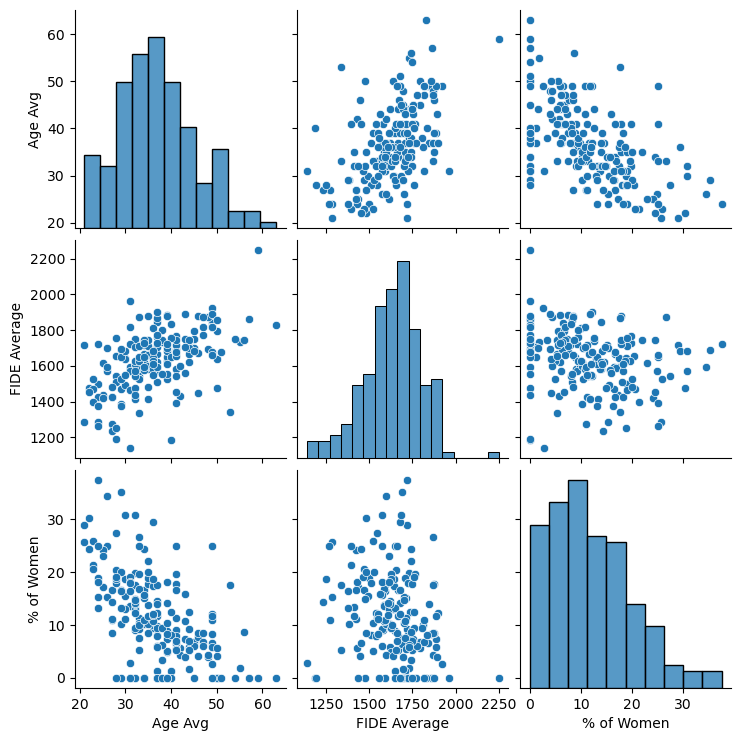

In [14]:
sns.pairplot(stats[['Age Avg', 'FIDE Average', '% of Women']])
plt.show()
#potentially some interesting correlations between age, FIDE average and % of Women with FIDE ratings.

In [15]:
games.columns

Index(['id', 'rated', 'created_at', 'duration', 'turns', 'victory_status',
       'winner', 'winner_bin', 'time_ctrl', 'increment_code', 'white_id',
       'white_rating', 'black_id', 'black_rating', 'rating_dif', 'moves',
       'opening_eco', 'opening_name', 'opening_simple', 'opening_moves',
       'opening_10', 'opening_ply', 'simpler_opening'],
      dtype='object')

In [16]:
y = games['winner_bin'] #winner_bin is a binary created from the winner's color, 1=white, 0=black, 
X = games[['turns','white_rating','black_rating','rating_dif']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

In [17]:
X.describe()

,const,turns,white_rating,black_rating,rating_dif
count,20058.0,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.0,60.465999,1596.631868,1588.831987,7.799880
std,0.0,33.570585,291.253376,291.036126,249.036667
min,1.0,1.000000,784.000000,789.000000,-1605.000000
25%,1.0,37.000000,1398.000000,1391.000000,-108.000000
50%,1.0,55.000000,1567.000000,1562.000000,3.000000
75%,1.0,79.000000,1793.000000,1784.000000,122.000000
max,1.0,349.000000,2700.000000,2723.000000,1499.000000


In [18]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
#There is not likely to be a linear correlation here, but still good to check.
#low r-squared and zeroed p values bear this out

                            OLS Regression Results                            
Dep. Variable:             winner_bin   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     976.4
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:57:30   Log-Likelihood:                -13191.
No. Observations:               20058   AIC:                         2.639e+04
Df Residuals:                   20054   BIC:                         2.642e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5922      0.020     28.999   

In [19]:
print(players.columns)
players.describe()
#no useful statistic to be derived here just yet.
#perhaps something modeling age to rank in the future, but nothing predictive is expected there

Index(['Country Rank', 'Name', 'Title', 'Country', 'FIDE', 'Age', ' K-factor'], dtype='object')


,Country Rank,Age,K-factor
count,175358.000000,175358.000000,175358.000000
mean,3221.141704,36.374463,29.539713
std,3779.534044,20.448013,10.328708
min,1.000000,6.000000,10.000000
25%,483.000000,18.000000,20.000000
50%,1653.000000,31.000000,20.000000
75%,4599.000000,53.000000,40.000000
max,16673.000000,970.000000,40.000000


In [38]:
players.head()

,Country Rank,Name,Title,Country,FIDE,Age,K-factor
index,,,,,,,
0,1,"Mirzaad, S.wahabuddin",FM,Afghanistan,1999.0,35,20
1,2,"Rahmani, Asef",unranked/unrated,Afghanistan,1871.0,49,20
2,3,"Sarwari, Hamidullah",unranked/unrated,Afghanistan,1866.0,33,20
3,4,"Sakhawaty, Sepehr",unranked/unrated,Afghanistan,1846.0,19,20
4,5,"Jamshedy, Mohammad Ismail",unranked/unrated,Afghanistan,1790.0,78,20


In [20]:

#the three logical regressions below show that player rating and the raw difference between ratings are not enough to account for one player winning over another
#this is expected given what we know about chess since rating (ELO) is determined by these

#the two key things seen below are the error message 'ConvergenceWarning' and the very low Pseudo R-squ.

In [21]:
logit = smf.logit("winner_bin ~ turns + white_rating + black_rating + rating_dif", data=games)
model = logit.fit()
print_model = model.summary()
print(print_model)

         Current function value: 0.620858
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             winner_bin   No. Observations:                20058
Model:                          Logit   Df Residuals:                    20053
Method:                           MLE   Df Model:                            4
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.1043
Time:                        09:57:31   Log-Likelihood:                -12453.
converged:                      False   LL-Null:                       -13903.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4115      0.094      4.378      0.000       0.227       0.596
turns           -0.0045      0.000     -9.673      0.000   

C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
logit = smf.logit("winner_bin ~ white_rating + black_rating + rating_dif", data=games)
model = logit.fit()
print_model = model.summary()
print(print_model)

         Current function value: 0.623217
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             winner_bin   No. Observations:                20058
Model:                          Logit   Df Residuals:                    20054
Method:                           MLE   Df Model:                            3
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.1009
Time:                        09:57:31   Log-Likelihood:                -12500.
converged:                      False   LL-Null:                       -13903.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2883      0.093      3.104      0.002       0.106       0.470
white_rating    -0.0010    575.119  -1.67e-06      1.000   

C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
games_1500 = games.loc[games['white_rating']<1501]

In [24]:
logit = smf.logit("winner_bin ~ turns + white_rating + black_rating + rating_dif", data=games_1500)
model = logit.fit()
print_model = model.summary()
print(print_model)
#Even when taking a smaller slice of the data, no results

         Current function value: 0.622883
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             winner_bin   No. Observations:                 8176
Model:                          Logit   Df Residuals:                     8171
Method:                           MLE   Df Model:                            4
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                 0.09240
Time:                        09:57:31   Log-Likelihood:                -5092.7
converged:                      False   LL-Null:                       -5611.2
Covariance Type:            nonrobust   LLR p-value:                3.547e-223
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1074      0.240     -0.448      0.654      -0.577       0.363
turns           -0.0033      0.001     -4.391      0.000   

C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
model.mle_retvals
#35 iterations and no convergence

{'fopt': 0.6228826565353837,
 'iterations': 35,
 'score': array([ 1.47740050e-17,  1.94669243e-16,  1.06789985e-14,  5.33949923e-15,
        -8.34296754e-16]),
 'Hessian': array([[-2.17727066e-01, -1.20038022e+01, -2.90215485e+02,
         -3.01521943e+02,  1.13064582e+01],
        [-1.20038022e+01, -8.84106519e+02, -1.60702198e+04,
         -1.66838767e+04,  6.13656946e+02],
        [-2.90215485e+02, -1.60702198e+04, -3.91091023e+05,
         -4.04592475e+05,  1.35014514e+04],
        [-3.01521943e+02, -1.66838767e+04, -4.04592475e+05,
         -4.26105249e+05,  2.15127745e+04],
        [ 1.13064582e+01,  6.13656946e+02,  1.35014514e+04,
          2.15127745e+04, -8.01132302e+03]]),
 'warnflag': 1,
 'converged': False}

In [26]:
games_greater_dif = games.loc[games['rating_dif']>200]

In [27]:
#Even when looking for a change where there is a significant rating difference, no results are found.
#this set brings the # of observations down to about 15% of the larger data set
logit = smf.logit("winner_bin ~ turns + white_rating + black_rating + rating_dif", data=games_greater_dif)
model = logit.fit()
print_model = model.summary()
print(print_model)

         Current function value: 0.503319
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             winner_bin   No. Observations:                 3287
Model:                          Logit   Df Residuals:                     3282
Method:                           MLE   Df Model:                            4
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                 0.02955
Time:                        09:57:31   Log-Likelihood:                -1654.4
converged:                      False   LL-Null:                       -1704.8
Covariance Type:            nonrobust   LLR p-value:                 6.757e-21
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2108      0.276      4.385      0.000       0.670       1.752
turns           -0.0095      0.001     -7.221      0.000   

C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
games.columns

Index(['id', 'rated', 'created_at', 'duration', 'turns', 'victory_status',
       'winner', 'winner_bin', 'time_ctrl', 'increment_code', 'white_id',
       'white_rating', 'black_id', 'black_rating', 'rating_dif', 'moves',
       'opening_eco', 'opening_name', 'opening_simple', 'opening_moves',
       'opening_10', 'opening_ply', 'simpler_opening'],
      dtype='object')

In [29]:
games['victory_status'].unique() #hunting for variables to add in

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

In [30]:
games['opening_simple'].nunique() #hunting for variables to add in

227

In [31]:
#let's only look at games that have a decisive result, so:
games_greater_dif_res = games.loc[(games['rating_dif']>200)&(games['victory_status']!='outoftime')] 

In [32]:
len(games_greater_dif_res)

3060

In [33]:
logit = smf.logit("winner_bin ~ turns + white_rating + black_rating + rating_dif", data=games_greater_dif_res)
model = logit.fit()
print_model = model.summary()
print(print_model)

         Current function value: 0.492971
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             winner_bin   No. Observations:                 3060
Model:                          Logit   Df Residuals:                     3055
Method:                           MLE   Df Model:                            4
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                 0.03379
Time:                        09:57:31   Log-Likelihood:                -1508.5
converged:                      False   LL-Null:                       -1561.2
Covariance Type:            nonrobust   LLR p-value:                 6.642e-22
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3349      0.294      4.547      0.000       0.760       1.910
turns           -0.0104      0.001     -7.465      0.000   

C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
model = smf.glm(formula = "winner_bin ~ turns + white_rating + black_rating + rating_dif", 
                data=games_greater_dif_res, 
                family = sm.families.Binomial())

# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())
# Estimated default probabilities
predictions = result.predict()
#running a GLM produces very low r-squared and zeroed p-values

                 Generalized Linear Model Regression Results                  
Dep. Variable:             winner_bin   No. Observations:                 3060
Model:                            GLM   Df Residuals:                     3056
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1508.5
Date:                Fri, 01 Dec 2023   Deviance:                       3017.0
Time:                        09:57:31   Pearson chi2:                 3.03e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.03389
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3349      0.294      4.547   

In [35]:
model = smf.glm(formula = "winner_bin ~ turns + white_rating + black_rating + rating_dif + simpler_opening", 
                data=games_greater_dif_res, 
                family = sm.families.Binomial())

# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())
# Estimated default probabilities
predictions = result.predict()
#last model to check is with the simplified opening name, a very broad category that might show some correlation between opening and white/black winning
#this will be further explored in Tableau

C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


                 Generalized Linear Model Regression Results                  
Dep. Variable:             winner_bin   No. Observations:                 3060
Model:                            GLM   Df Residuals:                     2932
Model Family:                Binomial   Df Model:                          127
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 01 Dec 2023   Deviance:                   1.1218e+05
Time:                        09:57:32   Pearson chi2:                 5.49e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [36]:
#Further analysis to be conducted in Tableau at this time, but python modeling shoudl be conducted on slices of the dataset in the future.

In [37]:

# opening_ratio = games.loc(games['winner']=='White').groupby(['opening_eco'],axis=0)[['opening_eco','victory_status','winner']].count('winner') 
#buggy, to be fixed in future